# Machine learning



### Heart Disease Prediction Analysis

In [1]:
## Understand the Dataset & cleanup (if required).
## Build classification models to predict whether or not the patients have Heart Disease.
## Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [1]:
## importing necessary libraries
import pandas as pd
from io import BytesIO

In [2]:
df= pd.read_csv(r"C:\Users\user\Desktop\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data  Cleaning and Exploration 

In [6]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# checking for null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

In [9]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

723

In [11]:
# Remove duplicates
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
723    False
733    False
739    False
843    False
878    False
Length: 302, dtype: bool

In [13]:
# check for the number of rows and columns
df.shape

(302, 14)

<AxesSubplot:ylabel='Density'>

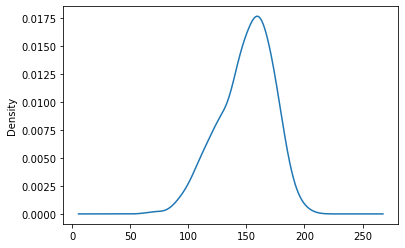

In [14]:


df.thalach.plot(kind='density')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

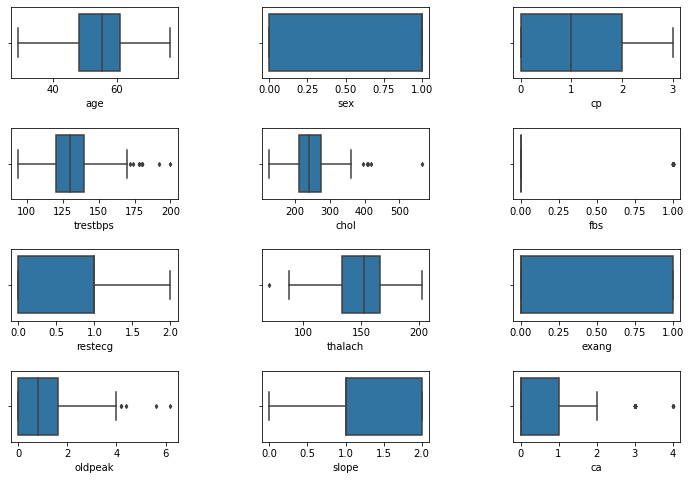

In [15]:
# check for any outliers

fig, ax = plt.subplots(4,3, figsize=(12, 8))
fig.subplots_adjust(hspace=0.7, wspace=0.5)
for variable, subplot in zip(df.select_dtypes(['float64', 'int']).columns, ax.flatten()):
    sns.boxplot(df[variable], ax=subplot, fliersize=3)
plt.show()

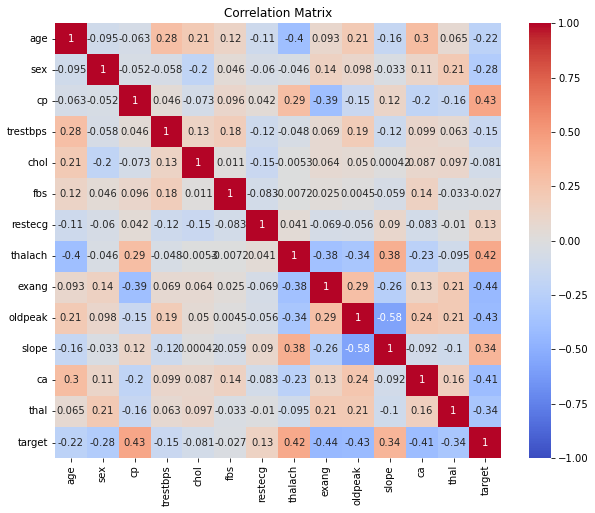

In [16]:
# create heatmap and show the correlation between the variable

corr_matrix = df.corr()
features = df.columns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Checking for the percentage of patient with heart disease

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients with no Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients with Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients with no Heart Disease: 45.70%
Percentage of Patients with Heart Disease: 54.30%


In [18]:
# Checking for the percentage of sex with heart disease

countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.79%
Percentage of Male Patients: 68.21%


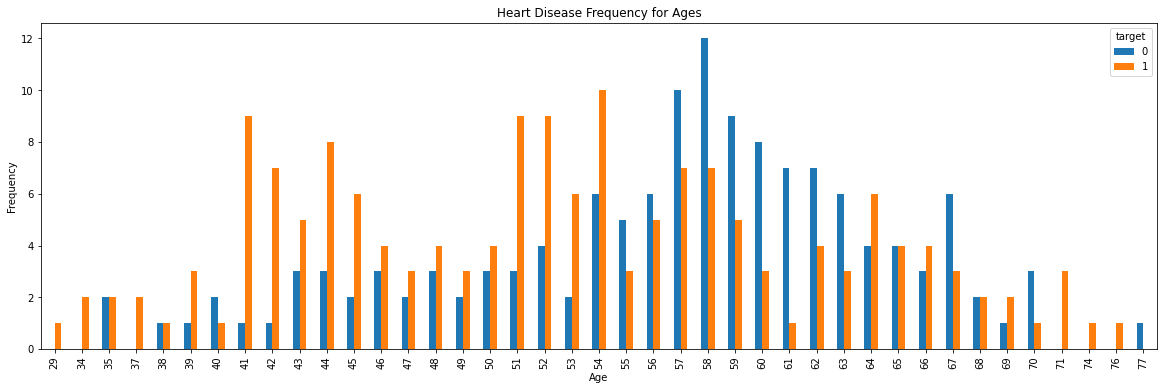

In [19]:
# Check for the effect of heart disease  by age

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

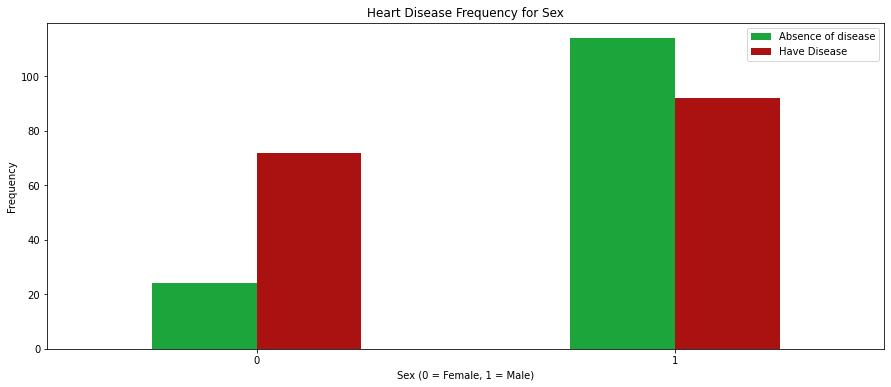

In [20]:
# Target by sex

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Absence of disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

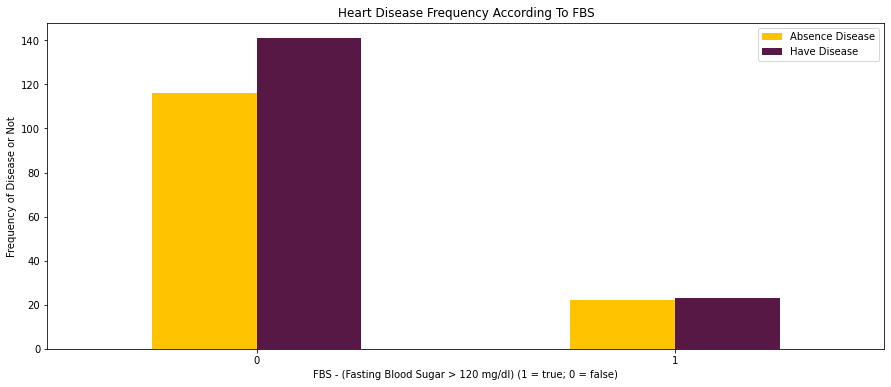

In [21]:
# Checking for fasting blood sugar by target

pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Absence Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

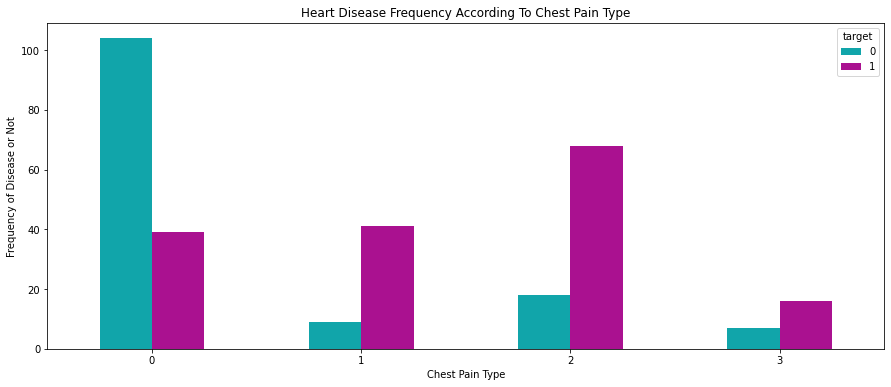

In [22]:
# Chest pain by target

pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

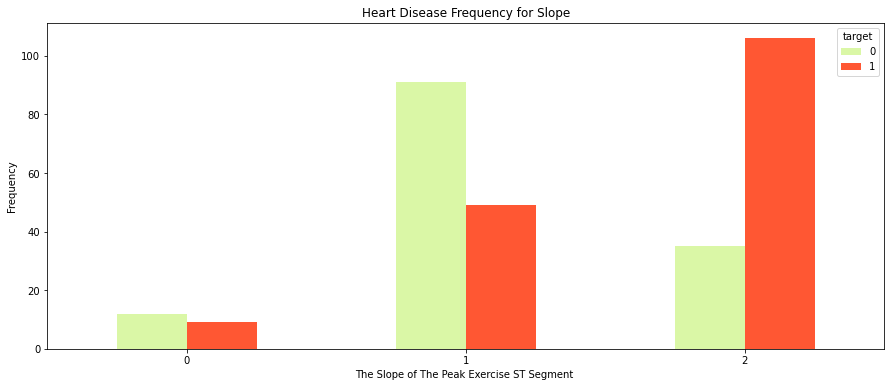

In [23]:
# slope by the target

pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

# Data Transformation

## Data Rescaling

In [24]:
## Rescaling ensures that each feature contributes proportionally to the analysis or model.

from sklearn.preprocessing import MinMaxScaler
df_array = df.values
df_array

array([[52.,  1.,  0., ...,  2.,  3.,  0.],
       [53.,  1.,  0., ...,  0.,  3.,  0.],
       [70.,  1.,  0., ...,  0.,  3.,  0.],
       ...,
       [52.,  1.,  0., ...,  1.,  3.,  0.],
       [59.,  1.,  3., ...,  0.,  2.,  0.],
       [54.,  1.,  0., ...,  1.,  3.,  0.]])

In [25]:
# Divide the values into two

X = df_array[:,0:13]
Y = df_array[:, 13]

In [26]:
from numpy import set_printoptions

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(X)
set_printoptions(precision=2)
print(rescaledx)

[[0.48 1.   0.   ... 1.   0.5  1.  ]
 [0.5  1.   0.   ... 0.   0.   1.  ]
 [0.85 1.   0.   ... 0.   0.   1.  ]
 ...
 [0.48 1.   0.   ... 1.   0.25 1.  ]
 [0.62 1.   1.   ... 1.   0.   0.67]
 [0.52 1.   0.   ... 0.5  0.25 1.  ]]


In [28]:
# Create a new dataframe using the rescaled dataset

rescaledxdf = pd.DataFrame(rescaledx, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
rescaledxdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


In [29]:
#Add the target variable
rescaledxdf['target'] = Y

In [30]:
rescaledxdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


## Standardization

In [31]:
# import relevant module

from sklearn.preprocessing import StandardScaler


standardx_array = rescaledxdf.values
standardx_array

array([[0.48, 1.  , 0.  , ..., 0.5 , 1.  , 0.  ],
       [0.5 , 1.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.85, 1.  , 0.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.48, 1.  , 0.  , ..., 0.25, 1.  , 0.  ],
       [0.62, 1.  , 1.  , ..., 0.  , 0.67, 0.  ],
       [0.52, 1.  , 0.  , ..., 0.25, 1.  , 0.  ]])

In [32]:
X= standardx_array[:, 0:13]
Y = standardx_array [:, 13]

In [33]:
scaler = StandardScaler().fit(X)
data = scaler.transform(X)
set_printoptions(precision =2)
print(data)

[[-0.27  0.68 -0.94 ...  0.98  1.27  1.12]
 [-0.16  0.68 -0.94 ... -2.27 -0.71  1.12]
 [ 1.72  0.68 -0.94 ... -2.27 -0.71  1.12]
 ...
 [-0.27  0.68 -0.94 ...  0.98  0.28  1.12]
 [ 0.51  0.68  1.98 ...  0.98 -0.71 -0.51]
 [-0.05  0.68 -0.94 ... -0.65  0.28  1.12]]


In [34]:
# Create a new dataframe using the standardized data

standard_df = pd.DataFrame(data, columns =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

# Add the target variable to the dataframe

standard_df["target"]=Y

In [35]:
standard_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,0.682656,-0.935208,-0.376556,-0.667728,-0.418446,0.901657,0.806035,-0.698344,-0.037124,0.979514,1.274980,1.119967,0.0
1,-0.157260,0.682656,-0.935208,0.478910,-0.841918,2.389793,-1.002541,0.237495,1.431958,1.773958,-2.271182,-0.714911,1.119967,0.0
2,1.724733,0.682656,-0.935208,0.764066,-1.403197,-0.418446,0.901657,-1.074521,1.431958,1.342748,-2.271182,-0.714911,1.119967,0.0
3,0.728383,0.682656,-0.935208,0.935159,-0.841918,-0.418446,0.901657,0.499898,-0.698344,-0.899544,0.979514,0.280034,1.119967,0.0
4,0.839089,-1.464866,-0.935208,0.364848,0.919336,2.389793,0.901657,-1.905464,-0.698344,0.739054,-0.645834,2.269926,-0.513994,0.0


## Normalization


In [36]:
from sklearn.preprocessing import Normalizer

In [37]:
normal_array = standard_df.values

In [38]:
X = normal_array[:, 0:13]
Y = normal_array[:, 13]

In [39]:
normalizer = Normalizer().fit(X).transform(X)

In [40]:
set_printoptions(precision = 2)
normalizer

array([[-0.09,  0.24, -0.33, ...,  0.35,  0.45,  0.4 ],
       [-0.03,  0.15, -0.2 , ..., -0.49, -0.16,  0.24],
       [ 0.39,  0.15, -0.21, ..., -0.51, -0.16,  0.25],
       ...,
       [-0.1 ,  0.24, -0.33, ...,  0.35,  0.1 ,  0.4 ],
       [ 0.14,  0.19,  0.55, ...,  0.27, -0.2 , -0.14],
       [-0.02,  0.23, -0.31, ..., -0.22,  0.09,  0.37]])

In [41]:
# Create the dataframe with the normalized dataset

normalized_df = pd.DataFrame(normalizer, columns =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

# Add the target variable

normalized_df["target"] = Y
                             
normalized_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.094941,0.241866,-0.331345,-0.133414,-0.236577,-0.148256,0.319458,0.285579,-0.247424,-0.013153,0.347043,0.451727,0.396805,0.0
1,-0.034157,0.148273,-0.203127,0.104019,-0.182865,0.519063,-0.217752,0.051584,0.311022,0.385304,-0.493301,-0.155279,0.243257,0.0
2,0.387723,0.153462,-0.210236,0.171763,-0.315441,-0.094067,0.202694,-0.241554,0.321907,0.301852,-0.510566,-0.160713,0.251770,0.0
3,0.253107,0.237217,-0.324977,0.324960,-0.292559,-0.145406,0.313318,0.173710,-0.242669,-0.312584,0.340373,0.097309,0.389179,0.0
4,0.180021,-0.314278,-0.200643,0.078276,0.197238,0.512715,0.193445,-0.408805,-0.149825,0.158559,-0.138560,0.486998,-0.110274,0.0


<AxesSubplot:ylabel='Density'>

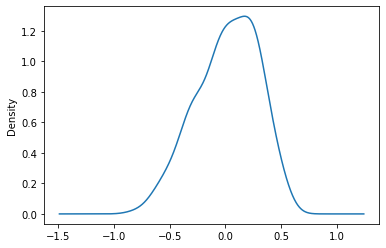

In [42]:
# To check if a column is normally or evenlly distributed and not skewd

normalized_df.thalach.plot(kind='density')


## Model training, Testing, Evaluation and Deployment

#### import libraries and modules

In [43]:
# import the relevant module and libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Create the imput and output variable

X = normalized_df.drop('target', axis = 1)
Y = normalized_df['target']

In [45]:
# Stating the test size and seperating the X and Y test, train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.5)


#### 1; Logistic Regression

0.7947019867549668
[[51 18]
 [13 69]]
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77        69
         1.0       0.79      0.84      0.82        82

    accuracy                           0.79       151
   macro avg       0.79      0.79      0.79       151
weighted avg       0.79      0.79      0.79       151



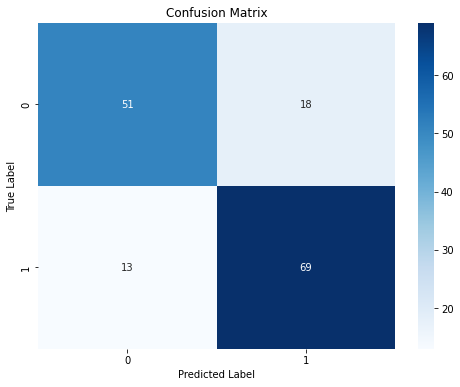

In [50]:
#model 1; logistic Regression

L = LogisticRegression(random_state=12)
model = L.fit(X_train, Y_train)
L_predict = L.predict(X_test)
LR_accuracy_score = accuracy_score(Y_test, L_predict)
print(LR_accuracy_score)

# To generate the confusion matrix
LR_cm = confusion_matrix(Y_test, L_predict)
print(LR_cm)

#To generate the report 
print (classification_report(Y_test, L_predict))

#Create  a heatmap for the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(LR_cm, annot=True, fmt='d', cmap='Blues')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()



#### 2; RandomForest  classifier

0.8013245033112583
[[51 18]
 [12 70]]
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77        69
         1.0       0.80      0.85      0.82        82

    accuracy                           0.80       151
   macro avg       0.80      0.80      0.80       151
weighted avg       0.80      0.80      0.80       151



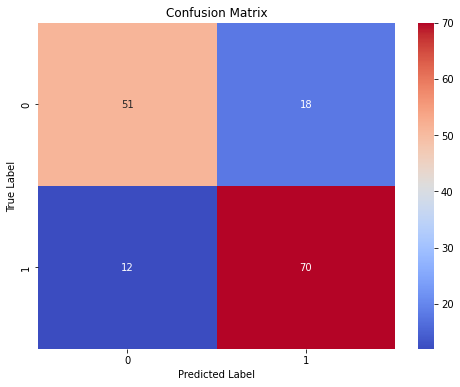

In [59]:
RF = RandomForestClassifier(random_state=12)
model = RF.fit(X_train, Y_train)
RF_predict = RF.predict(X_test)
RF_accuracy_score = accuracy_score(Y_test, RF_predict)
print(RF_accuracy_score)

# To generate the confusion matrix
RF_cm = confusion_matrix(Y_test, RF_predict)
print(RF_cm)

#To generate the report
print (classification_report(Y_test, RF_predict))

#Create  a heatmap for the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(RF_cm, annot=True, fmt='d', cmap='coolwarm')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()


#### 3; Decision Tree Classifier

0.7549668874172185
[[49 20]
 [17 65]]
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73        69
         1.0       0.76      0.79      0.78        82

    accuracy                           0.75       151
   macro avg       0.75      0.75      0.75       151
weighted avg       0.75      0.75      0.75       151



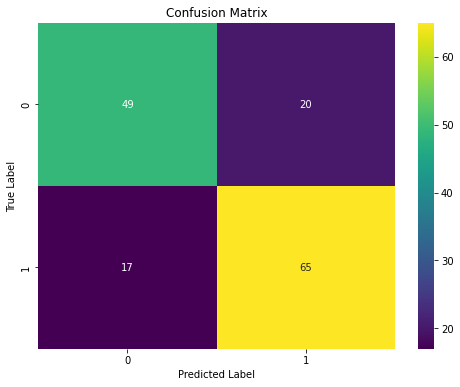

In [52]:
# Create the regression model

DT = DecisionTreeClassifier(random_state=12)
model = DT.fit(X_train, Y_train)
DT_predict = DT.predict(X_test)
DT_accuracy_score = accuracy_score(Y_test, DT_predict)
print(DT_accuracy_score)

# To generate the confusion matrix
DT_cm = confusion_matrix(Y_test, DT_predict)
print(DT_cm)

#To generate the report
print (classification_report(Y_test, DT_predict))

#Create  a heatmap for the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(DT_cm, annot=True, fmt='d', cmap='viridis')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()





#### 4; K nearest neighbours

Accuracy of K-NeighborsClassifier:
0.8079470198675497
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79        69
         1.0       0.84      0.80      0.82        82

    accuracy                           0.81       151
   macro avg       0.81      0.81      0.81       151
weighted avg       0.81      0.81      0.81       151



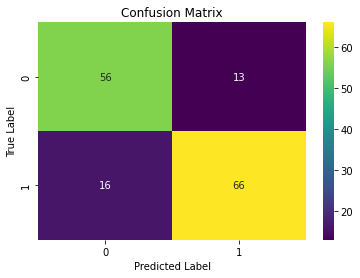

In [56]:

KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, Y_train)
KNN_predict = KNN.predict(X_test)
KNN_acc_score = accuracy_score(Y_test, KNN_predict)
print("Accuracy of K-NeighborsClassifier:")
print(KNN_acc_score)

# Generate the confusion matrix
KNN_cm = confusion_matrix(Y_test, KNN_predict)

#To generate the report
print (classification_report(Y_test, KNN_predict))

# Create a heatmap using seaborn
sns.heatmap(KNN_cm, annot=True, fmt='d', cmap='viridis')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

Accuracy of GradientBoostingClassifier:
0.8079470198675497
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75        69
         1.0       0.79      0.80      0.80        82

    accuracy                           0.77       151
   macro avg       0.77      0.77      0.77       151
weighted avg       0.77      0.77      0.77       151



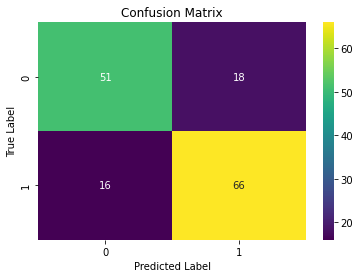

In [61]:
from sklearn.ensemble import GradientBoostingClassifier


GB = GradientBoostingClassifier(random_state = 12)
GB.fit(X_train, Y_train)
GB_predict = GB.predict(X_test)
GB_acc_score = accuracy_score(Y_test, KNN_predict)
print("Accuracy of GradientBoostingClassifier:")
print(GB_acc_score)

# Generate the confusion matrix
GB_cm = confusion_matrix(Y_test, GB_predict)

#To generate the report
print (classification_report(Y_test, GB_predict))

# Create a heatmap using seaborn
sns.heatmap(GB_cm, annot=True, fmt='d', cmap='viridis')

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [58]:
# Save the model in pickle for the purpose of reuseability 

import pickle

with open("K Nearest Neighbour Classification model on Heart Disease.pkl", "wb") as file:
    pickle.dump(KNN, file)


In [112]:
# Below is the accuracy score for each test model 

# Logistic Regression   == 79.47
# Random forest classifier ==80.13
# Decission Tres classifier == 75.49
# K nearest Neighbours classifier == 80.79
# 


### The best model ; K Nearest Neighbors Classifier due to specificity, interpretability and accuracy score

In [ ]:
import os
print(os.getcwd())
